run with `popstrucure` env

In [2]:
import os
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [3]:
proj_dir="/master/nplatt/sch_hae_its-nigeria"
results_dir=f"{proj_dir}/results"

In [4]:
info_df=pd.read_csv(f"{proj_dir}/its-nigeria_samplesheet.csv", sep=",")
info_df

,wgs_id,its_id,sra,species,country,locale,patient,miracidum
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,NaN,sbovis,nigeria,ak,1,1
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,NaN,sbovis,nigeria,ak,2,1
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,NaN,sbovis,nigeria,ak,2,2
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,NaN,sbovis,nigeria,ak,2,3
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,NaN,sbovis,nigeria,ak,3,1
...,...,...,...,...,...,...,...,...
200,Sh_NG_os_3_1,sh_ng_os_3_1,NaN,shaematobium,nigeria,osun,3,1
201,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,NaN,shaematobium,nigeria,osun,3,11
202,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,NaN,shaematobium,nigeria,osun,3,5
203,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,NaN,shaematobium,nigeria,osun,3,6


In [5]:
ref_fas=f"{proj_dir}/data/SH_V3.fa"

In [6]:
#you can get this table from the SCAN dryad link
its_df=pd.read_csv(f"{proj_dir}/results/sanger/its_class.csv", sep=",", keep_default_na=False,)
its_df

,wgs_id,its_id,its_seq,genotype_label,diagnostic_genotype,diagnostic_site_33,diagnostic_site_685,diagnostic_site_740,diagnostic_site_790,diagnostic_site_860,its_class
0,Sb_NG_ak_1.1,Sb.ng.ak.1.1F,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
1,Sb_NG_ak_2.1,sb_ng_ak_2.1,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
2,Sb_NG_ak_2.2,Sb.ng.ak.2.2F,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
3,Sb_NG_ak_2.3,Sb.ng.ak.2.3F,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-33_n1,GATAT,G,A,T,A,T,SBxSB
4,Sb_NG_ak_3.1,Sb.ng.ak.3.1R,TATAATGATGCATGCACCTGGCTTCTTGCTGGGCTGTATGTACCCT...,its-32_n34,GATAT,G,A,T,A,T,SBxSB
...,...,...,...,...,...,...,...,...,...,...,...
200,Sh_NG_os_3_1,sh_ng_os_3_1,CATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-3_n7,AGCGC,A,G,C,G,C,SHxSH
201,c_Sh_NG_os_3_11,Sh.ng.os.3.11F,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,AGCGC,A,G,C,G,C,SHxSH
202,c_Sh_NG_os_3_5,Sh.ng.os.3.5F,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-17_n14,AGCGC,A,G,C,G,C,SHxSH
203,c_Sh_NG_os_3_6,Sh.ng.os.3.6F,TATAATGATGCATGCACCTGGCTTCTTGCTGGACTGTATGTACCCT...,its-9_n44,AGCGC,A,G,C,G,C,SHxSH


# PCA

In [8]:
Path("{}/pca".format(results_dir)).mkdir(parents=True, exist_ok=True)
os.chdir("{}/pca".format(results_dir))

In [84]:
target_species = ['shaematobium', 'sbovis', 'shxsb', 'sbxsc', 'scurassoni']
info_df.loc[info_df["species"].isin(target_species), "wgs_id"].to_csv("ingroup.txt", sep=",", header=False, index=False)

In [85]:
%%bash 

conda run -n vcftools --cwd . --live-stream \
    vcftools \
        --vcf ../../results/filter_genotypes/SH_V3/snvs.ld.vcf \
        --keep ingroup.txt \
        --maf 0.05 \
        --recode \
        --recode-INFO-all \
        --stdout \
        >pca.vcf


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
./results/filter_genotypes/SH_V3/snvs.ld.vcf
	--keep ingroup.txt
	--recode-INFO-all
	--maf 0.05
ecode
	--stdout

ted at least 2 parts in FORMAT entry: ID=PID,Number=1,Type=String,Description="Physical phasing ID information, where each unique ID within a given sample (but not across samples) connects records within a phasing group">
r,Description="Normalized, Phred-scaled likelihoods for genotypes as defined in the VCF specification">
e count in genotypes, for each ALT allele, in the same order as listed">teger,Description="Allel
2 parts in INFO entry: ID=AC,Number=A,Type=Integer,Description="Allele count in genotypes, for each ALT allele, in the same order as listed">
mber=A,Type=Float,Description="Allele Frequency, for each ALT allele, in the same order as listed">
 entry: ID=MLEAC,Number=A,Type=Integer,Description="Maximum likelihood expectation (MLE) for the allele counts (not necessarily the s

In [108]:
%%bash 

conda run -n plink --cwd . \
    plink \
        --vcf pca.vcf \
        --pca \
        --double-id \
        --allow-extra-chr \
        --out pca

PLINK v1.9.0-b.7.7 64-bit (22 Oct 2024)            cog-genomics.org/plink/1.9/
urcell, Christopher Chang   GNU General Public License v3
Logging to pca.log.
Options in effect:
-allow-extra-chr
  --double-id
  --out pca
  --pca
  --vcf pca.vcf

ng 515643 MB for main workspace.

--vcf: 1k variants complete.
--vcf: 2k variants complete.
k variants complete.
--vcf: 4k variants complete.
--vcf: 5k variants complete.
mplete.6k variants co
--vcf: 7k variants complete.
--vcf: 8k variants complete.
--vcf: 9k variants complete.
: 10k variants complete.
--vcf: 11k variants complete.
--vcf: 12k variants complete.
ants complete.i
--vcf: 14k variants complete.
--vcf: 15k variants complete.
ete.f: 16k variants compl
--vcf: 17k variants complete.
--vcf: 18k variants complete.
--vcf: 19k variants complete.
: 20k variants complete.
--vcf: 21k variants complete.
--vcf: 22k variants complete.
ants complete.i
--vcf: 24k variants complete.
--vcf: 25k variants complete.
ete.f: 26k variants compl
--vcf: 27k v

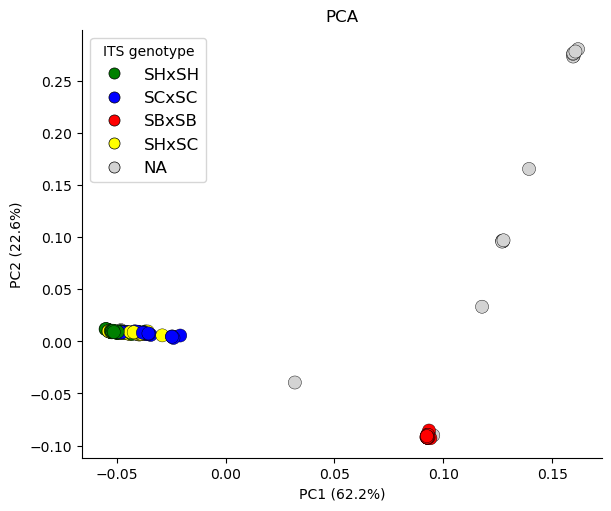

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# ---------- config ----------
eigenvec_file = "pca.eigenvec"
eigenval_file = "pca.eigenval"
raw_out_file  = "pca.raw.csv"
src_out_file  = "pca.source_data.csv"
png_out_file  = "pca.png"
svg_out_file  = "pca.svg"

# color map by ITS genotype
color_map = {
    "SHxSH": "green",
    "SCxSC": "blue",
    "SBxSB": "red",
    "SHxSC": "yellow",
    "NA":    "lightgray",
}
default_color = "lightgray"

# function for zorder: bring shxsh below other points
def zorder_for_class(cls: str) -> int:
    return 1 if cls == "shxsh" else 3


# ---------- load pca ----------
# pca.eigenvec: typically "fid iid pc1 pc2 ...". read as whitespace-delimited.
pca_df = pd.read_csv(eigenvec_file, sep=r"\s+", header=None)

# name columns: first two are ids; then pc1..pcN
n_cols = pca_df.shape[1]
n_pcs = n_cols - 2
pc_names = [f"pc{i}" for i in range(1, n_pcs + 1)]
pca_df.columns = ["fid", "wgs_id"] + pc_names

# keep a copy of raw table
pca_df.to_csv(raw_out_file, index=False)

# ---------- join annotations ----------
pca_df = (
    pca_df
    .merge(info_df[["wgs_id", "species"]], on="wgs_id", how="left")
    .merge(its_df[["wgs_id", "its_class"]], on="wgs_id", how="left")
)

# ---------- add aesthetics ----------
pca_df["color"] = pca_df["its_class"].map(color_map).fillna(default_color)
pca_df["zorder"] = pca_df["its_class"].apply(zorder_for_class)

# ---------- load eigenvalues ----------
val_df = pd.read_csv(eigenval_file, sep=r"\s+", header=None)
eigs = val_df.iloc[:, 0].to_numpy(dtype=float)

pc1_pct = (eigs[0] / eigs.sum() * 100) if eigs.size >= 1 else np.nan
pc2_pct = (eigs[1] / eigs.sum() * 100) if eigs.size >= 2 else np.nan

# ---------- plot ----------
fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)

# draw in passes for zorder
for zval, sub in pca_df.groupby("zorder", sort=True):
    ax.scatter(
        sub["pc1"], sub["pc2"],
        c=sub["color"],
        edgecolor="black",
        linewidths=0.3,
        s=89,
        zorder=int(zval),
    )

# legend from color_map
handles = [
    mlines.Line2D(
        [], [], marker="o",
        color="white",
        markeredgecolor="black",
        markerfacecolor=color_map[k],
        markersize=8,
        markeredgewidth=0.5,
        linestyle="None",
        label=k
    )
    for k in color_map.keys()
]
ax.legend(title="ITS genotype", handles=handles, prop={"size": 12})

ax.set_xlabel(f"PC1 ({pc1_pct:.1f}%)" if np.isfinite(pc1_pct) else "PC1")
ax.set_ylabel(f"PC2 ({pc2_pct:.1f}%)" if np.isfinite(pc2_pct) else "PC2")
ax.set_title("PCA")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ---------- save ----------
# plt.savefig(png_out_file, dpi=600, facecolor="white")
plt.savefig(svg_out_file, facecolor="white")

# ---------- export source data ----------
pca_df[["wgs_id", "pc1", "pc2", "species", "its_class", "color", "zorder"]].to_csv(src_out_file, index=False)


plt.show()
